<a href="https://colab.research.google.com/github/Jihyeon0928/Grokking-Deep-Learning/blob/master/%EB%B0%B0%EC%A7%80%ED%98%84/0410_colab_01_google_drive.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ㅇ# google drive와 colab연동하기 (기초)

## 구글드라이브 마운트 및 구글드라이브 파일 읽기

우선 본인의 드라이브 에

`[10]Lecuture/MachineLearning/datasets/lifesat/lifesat.csv'`

위와 같은 경로가 있어야 함.

각자 본인의 경로에 맞게 다음 코드셀의 내용을 바꿀것.

> colab의 왼쪽 메뉴에서 `파일`(폴더모양 아이콘)을 클릭하고 **(구글)드라이브 마운트** 를 클릭하여 본인의 구글 드라이브를 마운트! 
> 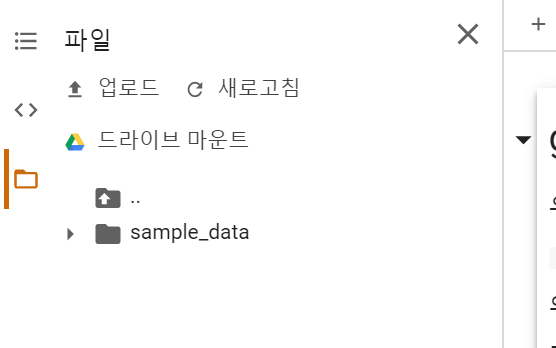


> 클릭 없이 코드로 하려면 다음을 수행.
> ```python
from google.colab import drive
drive.mount('/content/drive')
```
> unmount는 다음 코드로 
>
> ```python
drive.flush_and_unmount()
print('All changes made in this colab session should now be visible in Drive.')
```
> 
> PyDrive를 사용하면 보다 자유로운 구글드라이브 접근이 가능함.


In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
!cp  "./drive/My Drive/Classroom/Machine Learning 2020/lifesat.csv" ./lifesat.csv

위의 코드셀은 구글 드라이브로부터 파일을 읽어서 현재 pwd로 가져오는 명령어를 수행함.

만약,

`cp: cannot stat './drive/My Drive/[10]Lecture/MachineLearning/datasets/lifesat/lifesat.csv': No such file or directory`

위와 같은 메시지를 봤다면, 현재 구글 드라이브가 제대로 마운트 되지 않은 경우이거나 경로명이 틀렸거나 지정한 파일이 없는 경우임.

**파일이 존재하는지 확인하고 경로를 확인할 것**

정상적으로 수행시 colab의 현재 디렉토리에 `lifesat.csv`가 만들어짐.

> * 일반적으로 colab의 pwd(present working directory)는 `/content/`임.
> * bash가 기본 셀이며 셀명령어는 !를 치고 입력하면 됨. 예: `!ls`

In [8]:
!ls
!pwd

drive  lifesat.csv  sample_data
/content


## colab의 파일을 로컬로 가져오기.

다음의 코드셀을 참조할 것.

> ipad에선 안됨. ==;; 
> * 2020.4.6 현재 ipad에선 셀 명령어들을 이용하여 구글 드라이브로 복사시키는 형태를 취해야 함. 

In [0]:
#The code below doesn't work on the ipad.
from google.colab import files

#files.download(os.path.join('datasets','lifesat','lifesat.csv'))
files.download('lifesat.csv')

## 구글 드라이브 파일을 파이썬 코드에서 접근 (읽기 예제)

구글 드라이브 마운트를 통해 해당 파일들에 쉽게 접근 가능함.

In [11]:
import os

fstr = os.path.join('drive','My Drive',
                    'Classroom','Machine Learning 2020',
                    'lifesat.csv')
with open(fstr) as f:
  content = f.read()
  print(content)



Country,GDP per capita,Life satisfaction
Russia,9054.914,6.0
Turkey,9437.372,5.6
Hungary,12239.893999999998,4.9
Poland,12495.333999999999,5.8
Slovak Republic,15991.736,6.1
Estonia,17288.083,5.6
Greece,18064.288,4.8
Portugal,19121.592,5.1
Slovenia,20732.482,5.7
Spain,25864.721,6.5
Korea,27195.197,5.8
Italy,29866.581000000002,6.0
Japan,32485.545,5.9
Israel,35343.336,7.4
New Zealand,37044.891,7.3
France,37675.006,6.5
Belgium,40106.632000000005,6.9
Germany,40996.511,7.0
Finland,41973.988,7.4
Canada,43331.960999999996,7.3
Netherlands,43603.115,7.3
Austria,43724.030999999995,6.9
United Kingdom,43770.687999999995,6.8
Sweden,49866.265999999996,7.2
Iceland,50854.583,7.5
Australia,50961.865,7.3
Ireland,51350.744000000006,7.0
Denmark,52114.165,7.5
United States,55805.204000000005,7.2



## 구글 드라이브 파일을 파이썬 코드에서 접근 (쓰기 예제)

쓰는 것도 간단히 처리됨.

In [13]:
fstr = os.path.join('drive','My Drive',
                    'Classroom','Machine Learning 2020',
                    'foo.txt')

with open(fstr, 'w') as f:
  f.write('Hello Google Drive!')
!cat "./drive/My Drive/Classroom/Machine Learning 2020/foo.txt"

Hello Google Drive!

## 단점

위의 방법은 파일 읽기, 쓰기, 이동 만 지원.

프로그램 코딩을 통해,
* **공유 설정** 또는 
* **기타 메타데이터**를 

수정하려면 다른 방법이 필요함.


In [35]:
!cd /content/drive/My\ drive
!pwd

/bin/bash: line 0: cd: /content/drive/My drive: No such file or directory
/content/drive/My Drive/Classroom/Machine Learning 2020


In [16]:
cd /content/drive/My\ Drive

/content/drive/My Drive


In [27]:
cd /content/drive/My\ Drive/Classroom/Machine Learning 2020

/content/drive/My Drive/Classroom/Machine Learning 2020


In [28]:
ls

'[기계학습]201738418_배지현_self introduce.pptx'   foo.txt   lifesat.csv


In [0]:
import os, sys
from google.colab import drive

fstr = os.path.join('drive','My Drive','Classroom',
                    'Machine Learning 2020')
nb_path = '/content/ml'
#os.symlink(fstr,nb_path)
sys.path.insert(0,nb_path)

In [30]:
!ls -al

total 19643
-rw------- 1 root root 20112731 Apr  9 14:14 '[기계학습]201738418_배지현_self introduce.pptx'
-rw------- 1 root root       19 Apr 10 05:32  foo.txt
-rw------- 1 root root      784 Apr 10 05:12  lifesat.csv


In [31]:
!cd ./ml
!ls
!pwd

/bin/bash: line 0: cd: ./ml: No such file or directory
'[기계학습]201738418_배지현_self introduce.pptx'   foo.txt   lifesat.csv
/content/drive/My Drive/Classroom/Machine Learning 2020


In [36]:
pwd

'/content/drive/My Drive/Classroom/Machine Learning 2020'

In [37]:
cd /content/

/content
